In [10]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [1]:
import tensorflow

tensorflow.__version__

'2.16.1'

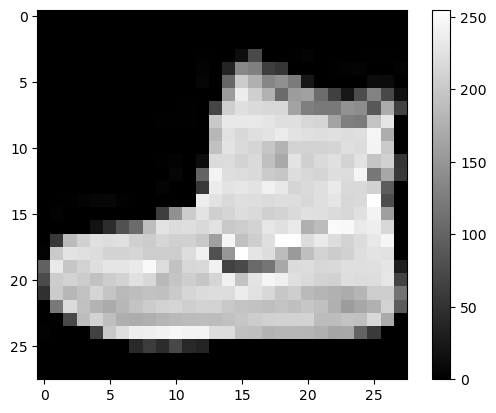

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# 데이터 확인하기
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.show()
print(X_train[0][:5])


In [3]:
y_train[0]

9

In [4]:
class_name = ['티셔츠/윗도리', '바지', '스웨터', '드레스', 
'코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']
class_name[9]

'앵클부츠'

In [ ]:
X_train[0].flatten()

In [ ]:
from PIL import Image
import numpy as np

arr = Image.open('1.jpeg')
arr

In [ ]:
np.array(arr).shape

In [ ]:
red_arr = np.array(arr)[:, :, 0]

In [ ]:
plt.imshow(red_arr, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
fhd > 1920*1080

In [ ]:
1920*1080 > 1280 * 720 > 640 * 320 > 28 * 28

In [ ]:
1280 * 720

In [ ]:
X_train.flatten().shape

In [ ]:
X_train[:2].reshape(-1, 784)

In [ ]:
X_train[0].min()

In [ ]:
X - min() / max() - min()

In [ ]:
# 데이터 스케일링
X_train = X_train / 255
X_test = X_test / 255
# 28 x 28 > 784 로 변환
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)
print(X_train.shape)

In [6]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

In [ ]:
pred = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

In [ ]:
class MultiClassNetwork:
    def __init__(self, units = 10): # 전과 동일
        self.units = units 
        self.w1 = None 
        self.b1 = None 
        self.w2 = None 
        self.b2 = None 
        self.a1 = None 
        self.losses = []
    def forpass(self, x): 
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(z1) # 활성 함수 이름 변경
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2
    def backprop(self, x, err): # 전과 동일
        m = len(x)
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    def sigmoid(self, z): # 시그모이드 함수
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def softmax(self, z): #소프트맥스 함수
        z = np.clip(z, -100, None)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis = 1).reshape(-1, 1)
    def init_weights(self, n_features, n_classes): # 클래스 개수 받음
        np.random.seed(0)
        self.w1 = np.random.normal(0, 1, (n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0, 1, (self.units, n_classes)) # 클래스 개수 포함
        self.b2 = np.zeros(n_classes) # 클래스 개수 포함
    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.softmax(z) # 출력 계층 활성 함수 변경
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        self.w1 -= w1_grad
        self.b1 -= b1_grad
        self.w2 -= w2_grad
        self.b2 -= b2_grad
        return a
    def fit(self, x, y, epochs = 100):
        m = len(x)
        self.init_weights(x.shape[1], y.shape[1]) # 가중치 초기화시 클래스 개수 포함
        for I in range(epochs): 
            print('.', end='') # epochs 1번마다 . 찍음
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-y * np.log(a)) # 크로스 엔트로피 손실 함수
            self.losses.append(loss / m)
    def predict(self, x):
        z = self.forpass(x)
        return np.argmax(z, axis = 1) # 예측한 결과에서 가장 큰 확률 인덱스
    def score(self, x, y):
        # 정답 인덱스 확인
        return np.mean(self.predict(x) == np.argmax(y, axis = 1)) 



In [20]:
# 딥러닝 - 다중분류 : y데이터를 원-핫 인코딩 해야한다.
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)
print(y_train_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
multiclass = MultiClassNetwork(units = 100)
multiclass.fit(X_train, y_train_encoded, epochs = 100)
multiclass.score(X_test, y_test_encoded)

In [ ]:
from PIL import Image

img = Image.open('t.png')
arr = np.array(img)

In [ ]:
X_test_sample = arr[:,:,1].flatten()

In [ ]:
plt.imshow(arr[:,:,1], cmap='gray')

In [ ]:
X_test.shape

In [ ]:
multiclass.predict(X_test_sample.reshape(1, -1))

In [ ]:
class_name[8]

In [21]:
# 회귀, 이진분류, 다중분류

class NeuralNetwork:
    def __init__(self, kind = 0, units = 10): 
        self.kind = kind
        # kind = {0, 1, 2}
        # 0:회귀, 1:이진, 2:다중
        self.units = units 
        self.w1 = None 
        self.b1 = None 
        self.w2 = None 
        self.b2 = None 
        self.a1 = None 
        self.losses = []
    # 정방향 계산
    def forpass(self, x): 
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(z1) # 활성화함수(시그모이드)
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2
    # 역전파 계산
    def backprop(self, x, err): 
        m = len(x)
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    # 시그모이드 함수
    def sigmoid(self, z): 
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    #소프트맥스 함수
    def softmax(self, z): 
        z = np.clip(z, -100, None)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis = 1).reshape(-1, 1)
    # 가중치 초기화
    def init_weights(self, n_features, n_classes): 
        np.random.seed(0)
        self.w1 = np.random.normal(0, 1, (n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0, 1, (self.units, n_classes)) 
        self.b2 = np.zeros(n_classes) 
    # 회귀, 분류일때 달라지는 지점
    ######################################
    def training(self, x, y, m):
        z = self.forpass(x)
        # 출력층에 활성화 함수적용
        if self.kind == 0:
            # 회귀 : y = x
            a = z
        elif self.kind == 1:
            # 이진분류 : 시그모이드
            a = self.sigmoid(z)
        else:
            # 다중분류 : 소프트맥스
            a = self.softmax(z) 
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        self.w1 -= w1_grad
        self.b1 -= b1_grad
        self.w2 -= w2_grad
        self.b2 -= b2_grad
        return a
    def loss(self, a, y, m):
        if self.kind == 2:
            # 다중분류 : 크로스 엔트로피 손실 함수
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-y * np.log(a)) 
        elif self.kind == 1:
            # 이진분류 : 로지스틱 손실 함수
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
        else:
            # 회귀
            loss = np.sum((y - a) ** 2)
        self.losses.append(loss / m)
    ####################################################################    
    
    def fit(self, x, y, epochs = 100):
        m = len(x)
        self.init_weights(x.shape[1], y.shape[1]) # 가중치 초기화시 클래스 개수 포함
        for I in range(epochs): 
            print('.', end='') # epochs 1번마다 . 찍음
            a = self.training(x, y, m)
            self.loss(a, y, m)
            


In [22]:
nn = NeuralNetwork(kind = 2)
nn.fit(X_train, y_train_encoded)

....................................................................................................

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
nn = NeuralNetwork(kind = 0)
nn.fit(X, y.reshape(-1, 1))

In [ ]:
nn = NeuralNetwork(kind = 0)
nn.fit(X, y.reshape(-1, 1))

In [ ]:
import numpy as np

class MultiClassNetwork:
    def __init__(self, units=10, units2=10): # 은닉층 노드 수 두 개 입력받음
        self.units = units 
        self.units2 = units2 # 새로운 은닉층의 노드 수
        self.w1 = None 
        self.b1 = None 
        self.w2 = None 
        self.b2 = None 
        self.w3 = None  # 새로운 은닉층의 가중치
        self.b3 = None  # 새로운 은닉층의 편향
        self.a1 = None 
        self.a2 = None  # 새로운 은닉층의 출력
        self.losses = []

    def forpass(self, x): 
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(z1) 
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.sigmoid(z2)  # 새로운 은닉층의 출력
        z3 = np.dot(self.a2, self.w3) + self.b3  # 새로운 은닉층의 출력을 다음 은닉층의 입력으로 사용
        return z3

    def backprop(self, x, err): 
        m = len(x)
        w3_grad = np.dot(self.a2.T, err) / m  # 새로운 은닉층의 그래디언트 계산
        b3_grad = np.sum(err) / m
        err_to_hidden2 = np.dot(err, self.w3.T) * self.a2 * (1 - self.a2)  # 새로운 은닉층에서의 오차
        w2_grad = np.dot(self.a1.T, err_to_hidden2) / m  # 은닉층2의 그래디언트 계산
        b2_grad = np.sum(err_to_hidden2, axis=0) / m
        err_to_hidden = np.dot(err_to_hidden2, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad  # 새로운 은닉층의 그래디언트 반환

    def sigmoid(self, z): 
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def softmax(self, z): 
        z = np.clip(z, -100, None)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)

    def init_weights(self, n_features, n_classes): 
        np.random.seed(0)
        self.w1 = np.random.normal(0, 1, (n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0, 1, (self.units, self.units2))  # 은닉층 2의 가중치
        self.b2 = np.zeros(self.units2)
        self.w3 = np.random.normal(0, 1, (self.units2, n_classes))  # 새로운 은닉층의 가중치
        self.b3 = np.zeros(n_classes)

    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.softmax(z) 
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad = self.backprop(x, err)
        self.w1 -= w1_grad
        self.b1 -= b1_grad
        self.w2 -= w2_grad
        self.b2 -= b2_grad
        self.w3 -= w3_grad  # 새로운 은닉층의 가중치 업데이트
        self.b3 -= b3_grad  # 새로운 은닉층의 편향 업데이트
        return a

    def fit(self, x, y, epochs=100):
        m = len(x)
        self.init_weights(x.shape[1], y.shape[1])
        for i in range(epochs): 
            print('.', end='') 
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-y * np.log(a)) 
            self.losses.append(loss / m)

    def predict(self, x):
        z = self.forpass(x)
        return np.argmax(z, axis=1)

    def score(self, x, y):
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

In [ ]:
multiclass = MultiClassNetwork(units = 128, units2 = 64)
multiclass.fit(X_train, y_train_encoded, epochs = 100)
multiclass.score(X_test, y_test_encoded)

In [ ]:
(784 * 100 + 100 ) + (100 * 10 + 10)

In [ ]:
(784 * 128 + 128 ) + (128 * 64 + 64) + (64 * 10 + 10)

In [ ]:
plt.plot(multiclass.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print(multiclass.losses[-1])

In [ ]:
np.random.normal(0, 2 / np.sqrt(10000), (10000)).max()

In [ ]:
np.random.normal(0, 2 / np.sqrt(10000000), (10000000)).max()

In [ ]:
class DualLayer():
    def __init__(self, units = 10):
        self.units = units
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.a1 = None
        self.losses = []
    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.activation(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2
    def backprop(self, x, err):
        m = len(x)
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.ones((self.units, 1))
        self.b2 = 0
    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        self.w1 -= w1_grad
        self.b1 -= b1_grad
        self.w2 -= w2_grad
        self.b2 -= b2_grad
        return a
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs = 100):
        y = y.reshape(-1,1)
        m = len(x)
        self.init_weights(x.shape[1]) 
        for i in range(epochs):
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
            self.losses.append(loss / m)
    def predict(self, x):
        z = self.forpass(x)
        return z > 0
    def score(self, x, y):
        return np.mean(self.predict(x) == y.reshape(-1, 1))


In [ ]:
class L2_regular(DualLayer): 
    def __init__(self, units = 10, l2 = 0):
        self.units = units 
        self.w1 = None 
        self.b1 = None 
        self.w2 = None 
        self.b2 = None 
        self.a1 = None 
        self.l2 = l2
        self.losses = []
    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        self.w1 -= w1_grad + self.l2 * self.w1
        self.b1 -= b1_grad
        self.w2 -= w2_grad + self.l2 * self.w2
        self.b2 -= b2_grad 
        return a
    
    def fit(self, x, y, epochs = 100):
        y = y.reshape(-1,1)
        m = len(x)
        self.init_weights(x.shape[1]) 
        for i in range(epochs):
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a))) + (self.l2 / 2) * (np.sum(self.w1 ** 2) + np.sum(self.w2 ** 2))
            # l1일때
#             loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a))) + (self.l1) * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2)))
            self.losses.append(loss / m)

In [ ]:
np.abs(np.array([-1,1,0]))

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
l2_1 = L2_regular(l2 = 0.001)
l2_1.fit(X_train_scaled, y_train, epochs = 1000)
print(l2_1.score(X_test_scaled, y_test))
l2_2 = L2_regular(l2 = 0.01)
l2_2.fit(X_train_scaled, y_train, epochs = 1000)
print(l2_2.score(X_test_scaled, y_test))
l2_3 = L2_regular(l2 = 0.1)
l2_3.fit(X_train_scaled, y_train, epochs = 1000)
print(l2_3.score(X_test_scaled, y_test))
l2_4 = L2_regular(l2 = 1)
l2_4.fit(X_train_scaled, y_train, epochs = 1000)
print(l2_4.score(X_test_scaled, y_test))

In [ ]:
plt.plot(l2_1.losses, 'r', label = 'L2_1')
plt.plot(l2_2.losses, 'g', label = 'L2_2')
plt.plot(l2_3.losses, 'b', label = 'L2_3')
plt.plot(l2_4.losses, 'y', label = 'L2_4')
# plt.ylim(0,0.6)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import ElasticNet

ElasticNet()